In [ ]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=084e5dc0b9d497f38f184d746b3cb1cb71390cc6de30f7bb0a03b51f2d5d66f6
  Stored in directory: /root/.cache/pip/wheels/a

In [ ]:
!apt-get install -y xvfb tk
!apt-get install -y x11-utils
!apt-get install -y xvfb gtk2-engines-pixbuf
!apt-get install -y dbus-x11 xfonts-base xfonts-75dpi xfonts-100dpi xfonts-cyrillic xfonts-scalable
import os
os.system('Xvfb :0 -screen 0 1024x768x24 -ac +extension GLX +extension RANDR +render -noreset &')
os.environ['DISPLAY'] = ':0.0'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tk is already the newest version (8.6.9+1).
tk set to manually installed.
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 38 not upgraded.
Need to get 7,697 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd6

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
import mlflow
import mlflow.sklearn
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/seattle-weather.csv')
df1=pd.DataFrame(df)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
df.info # Veri setinin genel bilgilerini yazdırır

<bound method DataFrame.info of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

In [ ]:
df.describe()  # Veri setinin istatistiksel özetini sağlar

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
#veri setinin boyutu
df.shape

(1461, 6)

In [ ]:
#Kolon sayısı
kolon_sayisi = len(df.columns)

#Satır sayısı
satir_sayisi = len(df)

print("Kolon sayısı:", kolon_sayisi)
print("Satır sayısı:", satir_sayisi)

Kolon sayısı: 6
Satır sayısı: 1461


In [ ]:
#Sütun isimlerini görüntüleme
columns = list(df.columns)
print("Sütunlar: ", columns)

Sütunlar:  ['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']


In [ ]:
#Veri tiplerini görüntüleme
print("\nVeri Türleri: ", df.dtypes)


Veri Türleri:  date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [ ]:
# Satır ve sütun ortalamalarını hesapla.
row_averages = df.mean(axis=1)
column_averages = df.mean(axis=0)

print("Satır Ortalamaları:\n", row_averages, "\n")
print("Sütun Ortalamaları:\n", column_averages)

Satır Ortalamaları:
 0        5.625
1        7.200
2        5.500
3       10.700
4        4.775
         ...  
1456     4.400
1457     2.375
1458     2.600
1459     2.000
1460     1.750
Length: 1461, dtype: float64 

Sütun Ortalamaları:
 precipitation     3.029432
temp_max         16.439083
temp_min          8.234771
wind              3.241136
dtype: float64


In [ ]:
# Null değerleri saymak için `isnull()` fonksiyonunu kullanarak boolean bir veri çerçevesi oluşturuyoruz
# Ardından, `sum()` fonksiyonunu kullanarak her sütundaki null değerlerin toplam sayısını hesaplıyoruz
null_sayisi = df.isnull().sum()
print(null_sayisi)

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
# # Veri seti eksik değerlerin yüzdesini hesaplar
df.isnull().sum()*100/len(df)

date             0.0
precipitation    0.0
temp_max         0.0
temp_min         0.0
wind             0.0
weather          0.0
dtype: float64

In [ ]:
unique_values = df['weather'].unique()
print("Farklı değerler:")
for value in unique_values:
    print(value)

Farklı değerler:
drizzle
rain
sun
snow
fog


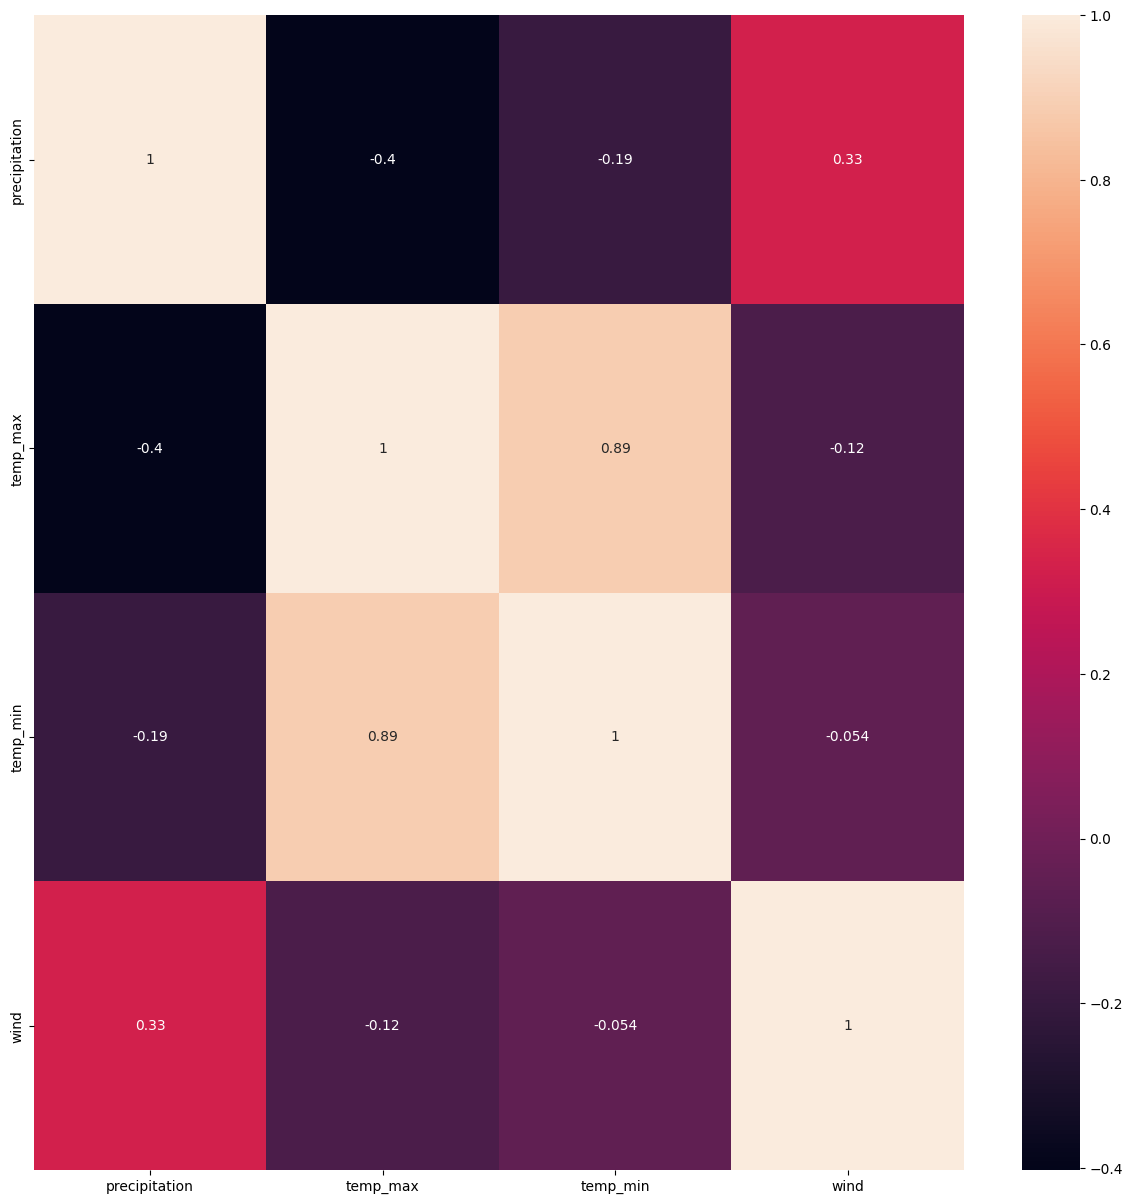

In [ ]:
# Korelasyon matrisini "spearman" yöntemiyle hesaplar.
# "spearman" yöntemi, veriler arasındaki sıralı ilişkileri değerlendirir ve korelasyonu hesaplar.
corrmat = df.corr(method="spearman")
# Heatmap grafiği için figür boyutunu belirler
# Heatmap grafiği, veri çerçevesindeki değerlerin görsel bir temsili olarak kullanılır. Renkler, veriler arasındaki ilişkileri gösterir ve annot=True parametresiyle korelasyon değerleri grafiğe eklenir.
plt.figure(figsize=(15, 15))
# Heatmap grafiğini çizer
g = sns.heatmap(corrmat, annot=True)

In [ ]:
dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in df['date']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
df['date'] = pd.DataFrame({'date':sorteddates})
df['Year'], df['Month'],  df['Day'] = df['date'].str.split('-').str
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,01,02
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,01,03
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,01,04
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,01,05
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2012,01,06
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2012,01,07
7,2012-01-08,0.0,10.0,2.8,2.0,sun,2012,01,08
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2012,01,09
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2012,01,10


In [ ]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
Year              object
Month             object
Day               object
dtype: object

In [ ]:
unique_values = df['weather'].unique()
print("Farklı değerler:")
for value in unique_values:
    print(value)

Farklı değerler:
drizzle
rain
sun
snow
fog


In [ ]:
#date sütununu silmek
df = df.drop(['date'], axis=1)

In [ ]:
df.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
Year              object
Month             object
Day               object
dtype: object

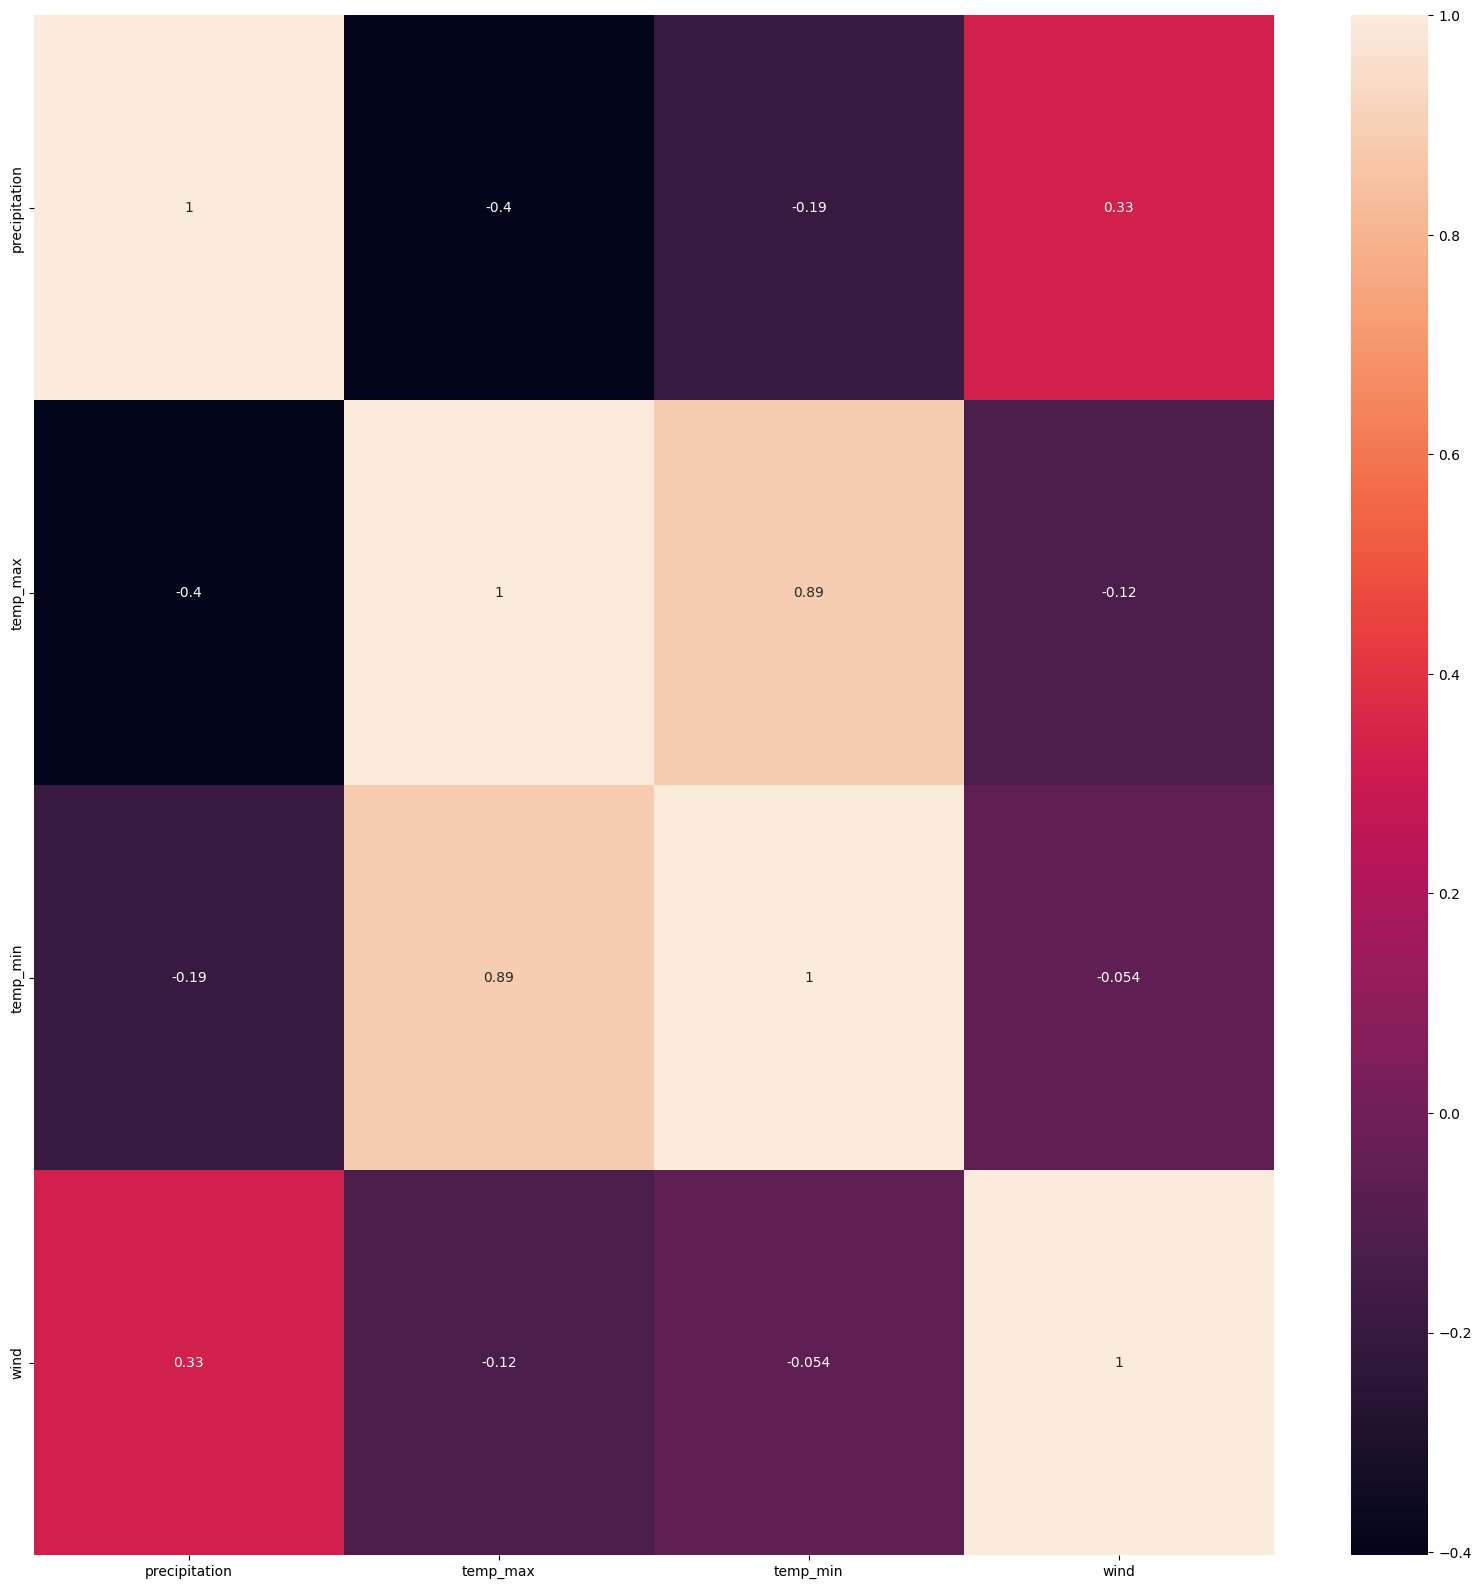

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

In [ ]:
# Yinelenen satırları kaldırma
df = df.drop_duplicates()
        
# String değerlere Label Encoding uygulama
label_encoder = LabelEncoder()
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(label_encoder.fit_transform)

# Integer değerlere ortalama ile eksik değerleri doldurma
integer_columns = df.select_dtypes(include=['int', 'float']).columns
df[integer_columns] = df[integer_columns].fillna(df[integer_columns].mean())
        
# String değerlere "Bilinmiyor" ile eksik değerleri doldurma
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].fillna("Bilinmiyor")

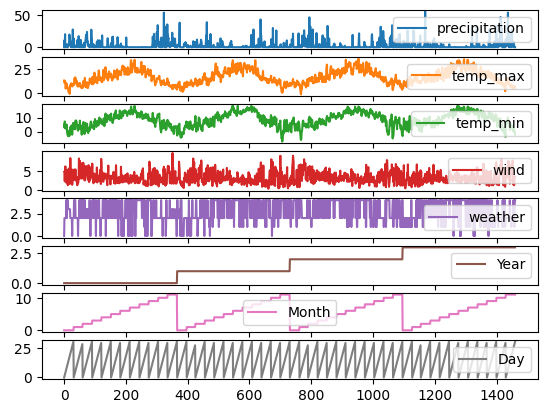

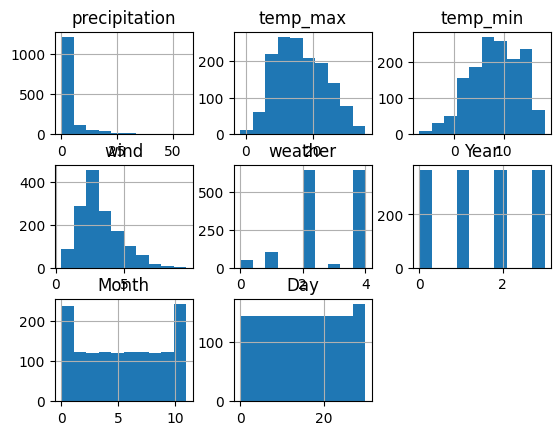

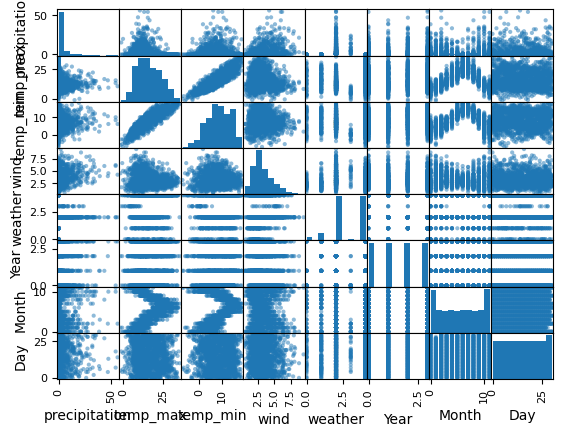

In [ ]:
# kutu grafigi
df.plot(subplots=True, sharex=False, sharey=False)
plt.show()

# histogram
df.hist()
plt.show()

# scatter plot matrix
scatter_matrix(df)
plt.show()

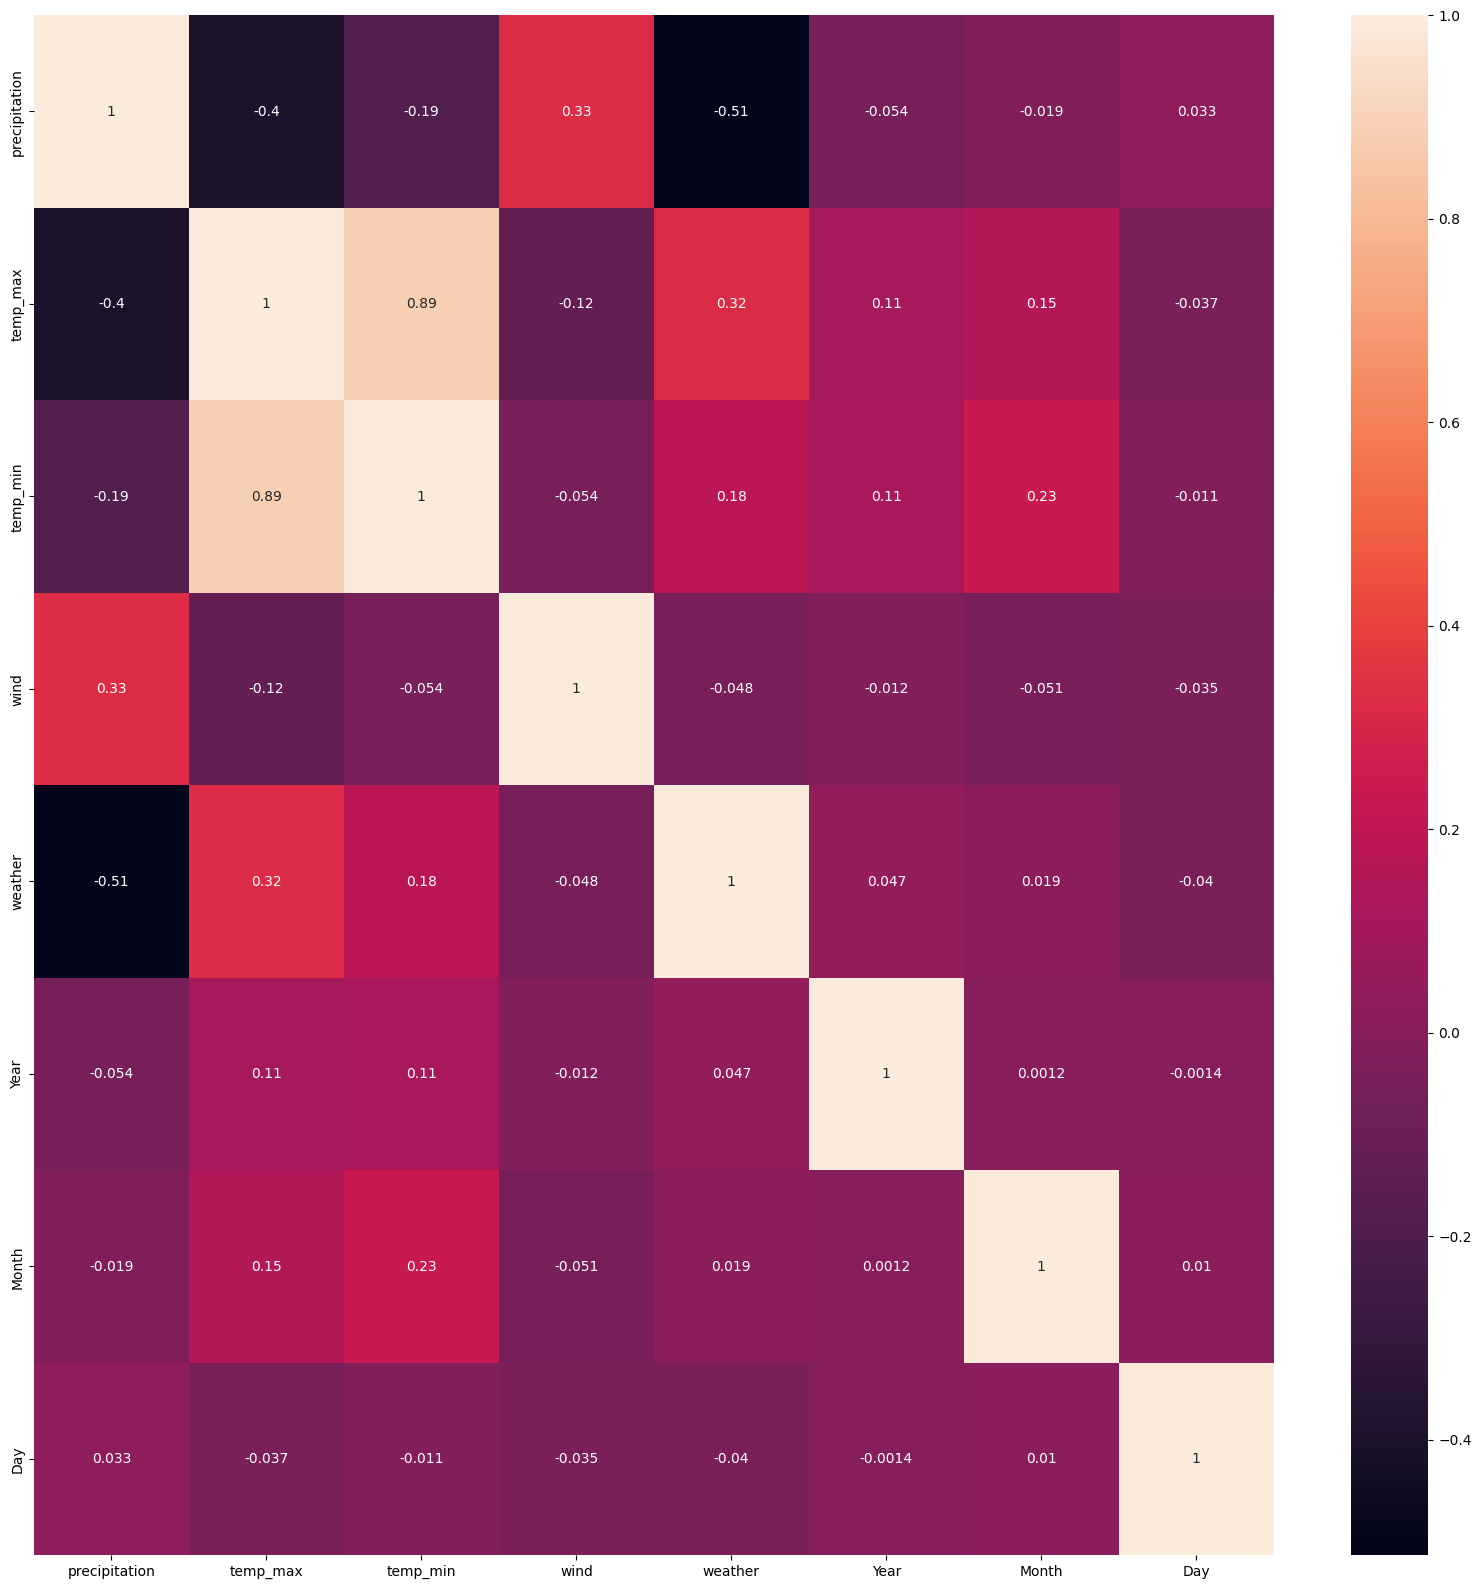

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

In [ ]:
df

,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,0.0,12.8,5.0,4.7,0,0,0,0
1,10.9,10.6,2.8,4.5,2,0,0,1
2,0.8,11.7,7.2,2.3,2,0,0,2
3,20.3,12.2,5.6,4.7,2,0,0,3
4,1.3,8.9,2.8,6.1,2,0,0,4
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2,3,11,26
1457,1.5,5.0,1.7,1.3,2,3,11,27
1458,0.0,7.2,0.6,2.6,1,3,11,28
1459,0.0,5.6,-1.0,3.4,4,3,11,29


In [ ]:
# Bağımsız değişkenleri ve hedef değişkeni ayırma
X = df.drop("weather", axis=1)  # Bağımsız değişkenler
Y = df["weather"]  # Hedef değişken

# Veri setini eğitim ve test kümelerine ayırma
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=16)

1)Model Eğitimi: MLflow, farklı model algoritmalarını ve hiperparametre ayarlarını denemek için kullanılabilir. MLflow'un entegre olduğu makine öğrenimi kütüphaneleri ile eğitim süreçlerinizi izleyebilir, model ağırlıklarını ve hiperparametreleri kaydedebilir ve sonuçları karşılaştırabilirsiniz.

2)Model Değerlendirme ve Performans İzleme: MLflow, modelinizi değerlendirmek ve performansını izlemek için kullanılabilir. Metrikleri kaydedebilir, farklı modellerin performansını karşılaştırabilir ve hata analizi yapabilirsiniz.

In [ ]:
mlflow.end_run()
# MLflow oturumu başlatılır
mlflow.start_run()

# Modellerin listesi oluşturulur
models = [
    ("LR", LogisticRegression()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier()),
    ("DT", DecisionTreeClassifier()),
    ("NB", GaussianNB()),
    ("SVM", SVC()),
    ("RF", RandomForestClassifier()),
    ("KA", DecisionTreeClassifier())
]

# K-fold cross-validation için kullanılacak n_splits değeri
n_splits = 10

# Modeller için cross validation sonuçlarının kaydedilmesi ve yazdırılması
for name, model in models:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    
    # Model performans metriklerinin kaydedilmesi
    mlflow.set_tag("model_name", name)
    mlflow.log_metrics({"accuracy_mean": cv_results.mean(), "accuracy_std": cv_results.std()})
    
    # Modelin MLflow üzerinde kaydedilmesi
    mlflow.sklearn.log_model(model, name)
    
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

# MLflow oturumu sonlandırılır
mlflow.end_run()

LR: 0.841595 (0.026389)
LDA: 0.719200 (0.044209)
KNN: 0.732998 (0.037516)
DT: 0.789765 (0.030118)
NB: 0.836753 (0.029112)
SVM: 0.770364 (0.031465)
RF: 0.861652 (0.021868)
KA: 0.789780 (0.028387)


3)Model İzleme ve Yeniden Eğitim: MLflow, dağıtılmış modellerinizi izleyebilir, gerçek zamanlı tahmin sonuçlarını kaydedebilir ve geri bildirimleri değerlendirebilirsiniz. Ayrıca, modelinizi sürekli olarak yeniden eğitebilir ve güncelleyebilirsiniz.

In [ ]:
# Parametre aralıklarını belirleme
test_size_range = [0.1, 0.2, 0.3, 0.4, 0.5]
random_state_range = list(range(0, 101))
max_depth_range = list(range(1, 11))

best_accuracy = 0.0
best_params = {}

# Parametre kombinasyonlarını döngüyle oluşturma
for test_size in test_size_range:
    for random_state in random_state_range:
        for max_depth in max_depth_range:
            # Veri setini eğitim ve test kümelerine bölme
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

            # Random Forest sınıflandırıcı modelini oluşturma
            rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=random_state)

            # Modeli eğitme
            rf.fit(X_train, Y_train)

            # Tahminleri yapma
            Y_pred = rf.predict(X_test)

            # Kesinlik skorunu hesaplama
            accuracy = accuracy_score(Y_test, Y_pred)

            # En iyi parametreleri güncelleme
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'test_size': test_size, 'random_state': random_state, 'max_depth': max_depth}

# En iyi parametreleri yazdırma
print("En iyi parametreler: ", best_params)
print("En iyi kesinlik skoru: ", best_accuracy)
mlflow.end_run()
# MLflow oturumu başlatılır
mlflow.start_run()

# Model eğitimi
model = RandomForestClassifier(n_estimators=100, max_depth=best_params['max_depth'],
                               random_state=best_params['random_state'])
model.fit(X_train, Y_train)

# Eğitim sonuçları ve model kaydedilir
mlflow.log_params({"test_size": best_params['test_size'],
                   "random_state": best_params['random_state'],
                   "max_depth": best_params['max_depth']})
mlflow.log_metrics({"accuracy": best_accuracy})
mlflow.sklearn.log_model(model, "model")

# MLflow oturumu sonlandırılır
mlflow.end_run()

En iyi parametreler:  {'test_size': 0.1, 'random_state': 92, 'max_depth': 10}
En iyi kesinlik skoru:  0.9319727891156463


In [ ]:
# Eğitim ve test veri setleri üzerinde tahmin yapma
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Tahminlerin performansını değerlendirme
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print("Eğitim veri seti hata kare ortalaması (MSE):", train_mse)
print("Test veri seti hata kare ortalaması (MSE):", test_mse)

Eğitim veri seti hata kare ortalaması (MSE): 0.26301369863013696
Test veri seti hata kare ortalaması (MSE): 1.2626538987688098


In [ ]:
# Gerçek fiyatlar
Y_train_true = Y_train.values
Y_test_true = Y_test.values

# Tahmin edilen fiyatlar
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Gerçek fiyatlar ve tahmin edilen fiyatları birleştirme
train_results = pd.DataFrame({'Gerçek hava durumu': Y_train_true, 'Tahmini hava durumu': Y_train_pred})
test_results = pd.DataFrame({'Gerçek hava durumu': Y_test_true, 'Tahmini hava durumu': Y_test_pred})

# Sonuçları ekrana yazdırma
print("Eğitim veri seti:")
print(train_results.head())

print("\nTest veri seti:")
print(test_results.head())

Eğitim veri seti:
   Gerçek hava durumu  Tahmini hava durumu
0                   4                    4
1                   2                    2
2                   4                    4
3                   1                    1
4                   4                    4

Test veri seti:
   Gerçek hava durumu  Tahmini hava durumu
0                   2                    2
1                   4                    4
2                   2                    2
3                   0                    0
4                   2                    2


In [ ]:
unique_values = df['weather'].unique()
print("Farklı veri sayısı:", len(unique_values))

Farklı veri sayısı: 5


In [ ]:
value_counts = df['weather'].value_counts()
print("Farklı veri sayısı:", len(value_counts))

Farklı veri sayısı: 5


In [ ]:
unique_values = df['weather'].unique()
print("Farklı değerler:")
for value in unique_values:
    print(value)

Farklı değerler:
0
2
4
3
1


In [ ]:
# Tahmin işlemi için yeni verilerin dönüştürülmesi

new_data = {}

new_data['precipitation'] = float(input("Precipitation: "))
new_data['temp_max'] = float(input("Temp max: "))
new_data['temp_min'] = float(input("Temp min: "))
new_data['wind'] = float(input("Wind: "))
new_data['Year'] = int(input("Year: "))
new_data['Month'] = int(input("Month: "))
new_data['Day'] = int(input("Day: "))

new_df = pd.DataFrame(new_data, index=[0])
label_encoder = LabelEncoder()

# Yeni verilerin dönüştürülmesi
string_columns = new_df.select_dtypes(include=['object']).columns
new_df[string_columns] = new_df[string_columns].apply(label_encoder.fit_transform)

# Eğitim veri setindeki sütunlarla yeni veri seti arasında eşleştirme
new_df = new_df.reindex(columns=X.columns, fill_value=0)

prediction = int(rf.predict(new_df))

print("Tahmin edilen hava durumu:", prediction)
def durum(prediction):
  if prediction == 0:
    print("Tahminlerimize göre hava durumu drizzle")
  elif prediction == 1:
    print( "Tahminlerimize göre hava durumu fog")
  elif prediction == 2:
    print("Tahminlerimize göre hava durumu rain")
  elif prediction == 3:
    print( "Tahminlerimize göre hava durumu snow")
  else:
    print("Tahminlerimize göre hava durumu sun")

durum(prediction)


Precipitation: 20.3
Temp max: 12.2
Temp min: 5.6
Wind: 4.7
Year: 2012
Month: 01
Day: 04
Tahmin edilen hava durumu: 2
Tahminlerimize göre hava durumu rain


In [ ]:
!pip install ipywidgets

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def predict_weather(precipitation, temp_max, temp_min, wind, Year, Month, Day):
    new_data = {}

    new_data['precipitation'] = precipitation
    new_data['temp_max'] = float(temp_max)
    new_data['temp_min'] = temp_min
    new_data['wind'] = wind
    new_data['Year'] = Year
    new_data['Month'] = Month
    new_data['Day'] = Day

    new_df = pd.DataFrame(new_data, index=[0])
    label_encoder = LabelEncoder()

    # Yeni verilerin dönüştürülmesi
    string_columns = new_df.select_dtypes(include=['object']).columns
    new_df[string_columns] = new_df[string_columns].apply(label_encoder.fit_transform)

    # Eğitim veri setindeki sütunlarla yeni veri seti arasında eşleştirme
    new_df = new_df.reindex(columns=X.columns, fill_value=0)

    prediction = rf.predict(new_df)

    if prediction == 0:
        return "Tahminlerimize göre hava durumu: drizzle"
    elif prediction == 1:
        return "Tahminlerimize göre hava durumu: fog"
    elif prediction == 2:
        return "Tahminlerimize göre hava durumu: rain"
    elif prediction == 3:
        return "Tahminlerimize göre hava durumu: snow"
    else:
        return "Tahminlerimize göre hava durumu: sun"

interact(predict_weather, precipitation='0.0', temp_max='5.6', temp_min='-2.1', wind='3.5', Year='2015', Month='12', Day='31')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


interactive(children=(Text(value='0.0', description='precipitation'), Text(value='5.6', description='temp_max'…

<function __main__.predict_weather(precipitation, temp_max, temp_min, wind, Year, Month, Day)>

In [ ]:
def predict_weather(precipitation, temp_max, temp_min, wind, Year, Month, Day):
    new_data = {}

    new_data['precipitation'] = precipitation
    new_data['temp_max'] = float(temp_max)
    new_data['temp_min'] = temp_min
    new_data['wind'] = wind
    new_data['Year'] = Year
    new_data['Month'] = Month
    new_data['Day'] = Day

    new_df = pd.DataFrame(new_data, index=[0])
    label_encoder = LabelEncoder()

    # Yeni verilerin dönüştürülmesi
    string_columns = new_df.select_dtypes(include=['object']).columns
    new_df[string_columns] = new_df[string_columns].apply(label_encoder.fit_transform)

    # Eğitim veri setindeki sütunlarla yeni veri seti arasında eşleştirme
    new_df = new_df.reindex(columns=X.columns, fill_value=0)

    prediction = rf.predict(new_df)

    if prediction == 0:
        return "Tahminlerimize göre hava durumu: drizzle"
    elif prediction == 1:
        return "Tahminlerimize göre hava durumu: fog"
    elif prediction == 2:
        return "Tahminlerimize göre hava durumu: rain"
    elif prediction == 3:
        return "Tahminlerimize göre hava durumu: snow"
    else:
        return "Tahminlerimize göre hava durumu: sun"

precipitation_widget = widgets.FloatText(description='Precipitation:')
temp_max_widget = widgets.FloatText(description='Temp max:')
temp_min_widget = widgets.FloatText(description='Temp min:')
wind_widget = widgets.FloatText(description='Wind:')
year_widget = widgets.IntText(description='Year:')
month_widget = widgets.IntText(description='Month:')
day_widget = widgets.IntText(description='Day:')

interact(predict_weather, 
         precipitation=precipitation_widget,
         temp_max=temp_max_widget,
         temp_min=temp_min_widget,
         wind=wind_widget,
         Year=year_widget,
         Month=month_widget,
         Day=day_widget)

interactive(children=(FloatText(value=0.0, description='Precipitation:'), FloatText(value=0.0, description='Te…

<function __main__.predict_weather(precipitation, temp_max, temp_min, wind, Year, Month, Day)>